<img style="width:100%" src="https://thumbs.dreamstime.com/t/banner-shoulder-ray-blue-tone-part-rib-130883110.jpg"><br><br>
# Clasificador de radiografías
<br>

## Detección de neumonía

In [2]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\Max Dacko\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob

#para redimencionar
import sklearn
import skimage
from skimage.transform import resize

import random
#Usaremos datetime para nombrar archivos
import datetime

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

print(tf.__version__)


2.5.0


In [9]:
train_dir = "chest_xray/train/"
test_dir =  "chest_xray/test/"

LOAD_FROM_IMAGES = False

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3),mode='constant',anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


if LOAD_FROM_IMAGES:
    #cargamos las imágenes a los arrays
    X_train, y_train = get_data(train_dir)
    X_test, y_test= get_data(test_dir)
    
    #grabamos los arrays en archivos
    np.save('xtrain.npy', X_train)
    np.save('ytrain.npy', y_train)
    np.save('xtest.npy', X_test)
    np.save('ytest.npy', y_test)
else:
    #cargamos los arrays anteriormente grabados
    X_train = np.load('xtrain.npy')
    y_train = np.load('ytrain.npy')
    X_test = np.load('xtest.npy')
    y_test = np.load('ytest.npy')



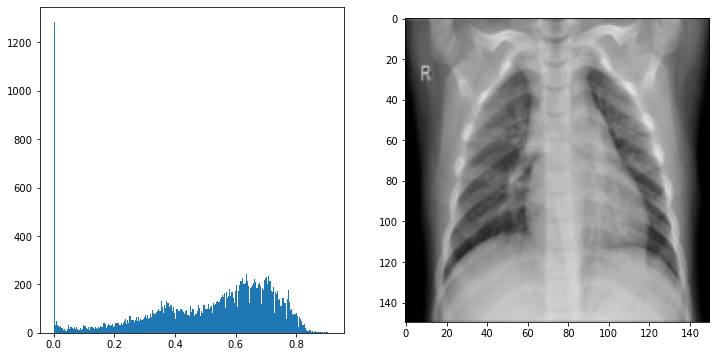

In [13]:

def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
    
plotHistogram(X_train[5])


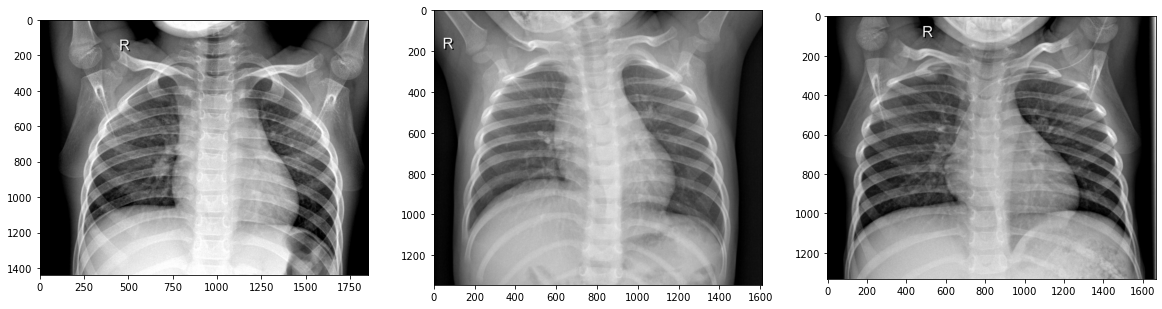

In [16]:
multipleImages = glob('chest_xray/train/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
plotThreeImages(multipleImages)

No Neumonía


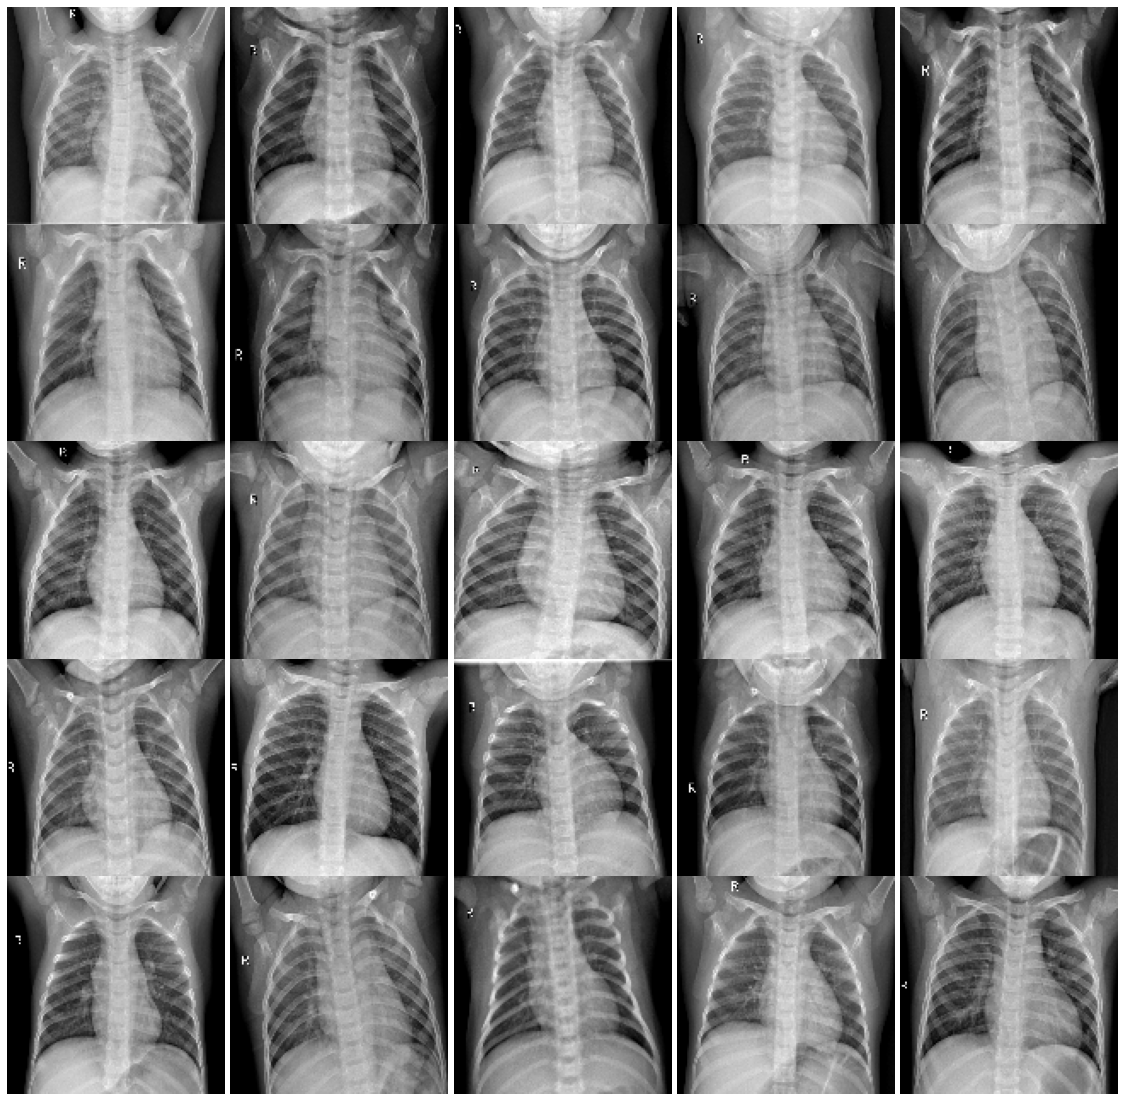

In [26]:
print("No Neumonía")
multipleImages = glob('chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Si neumonía


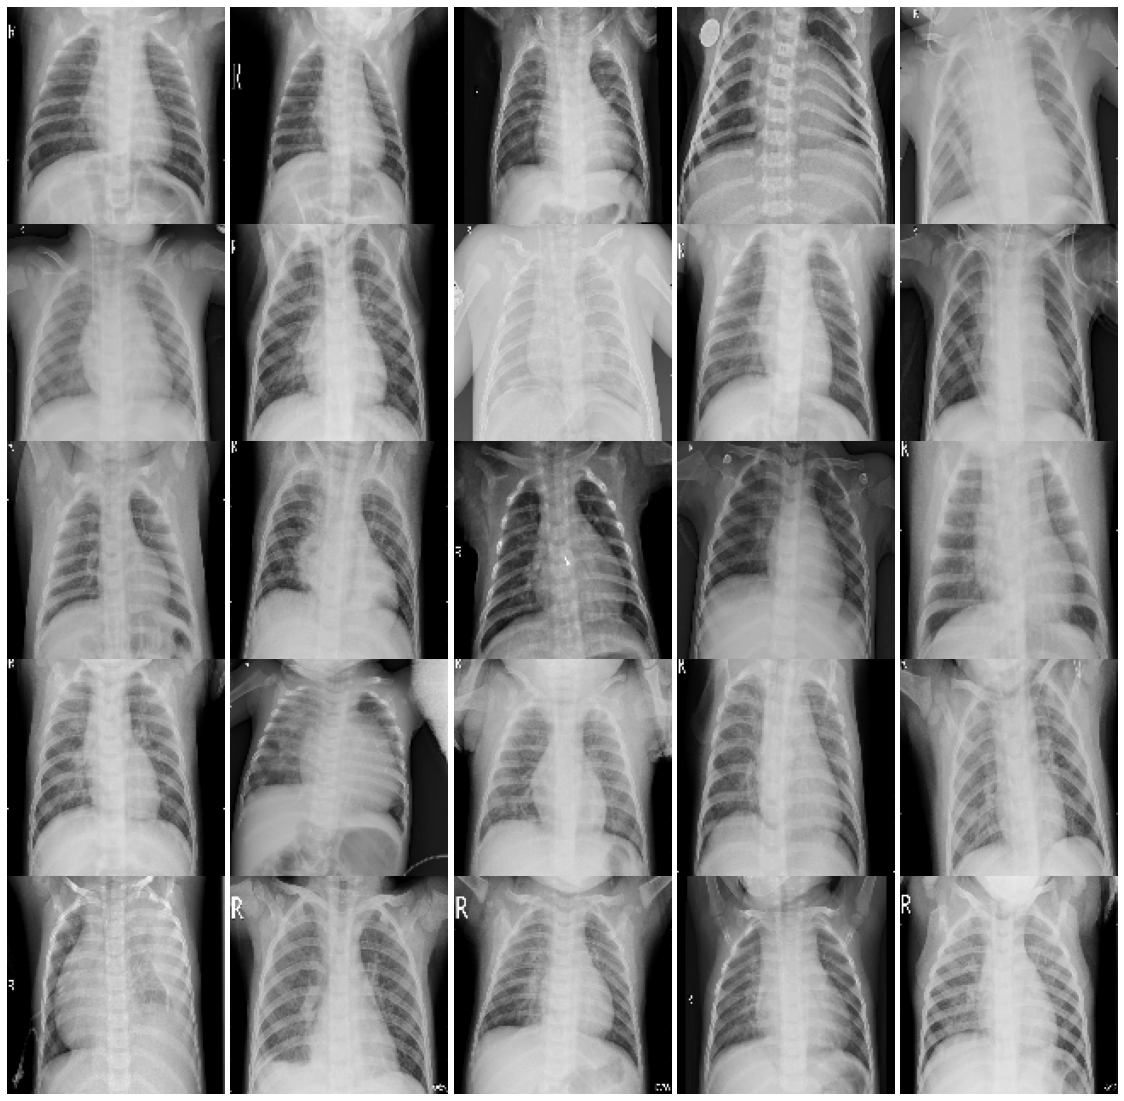

In [25]:
print("Si neumonía")
multipleImages = glob('chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'No Neumonía', 1: 'Si Neumonía'}


C:\Users\Max Dacko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


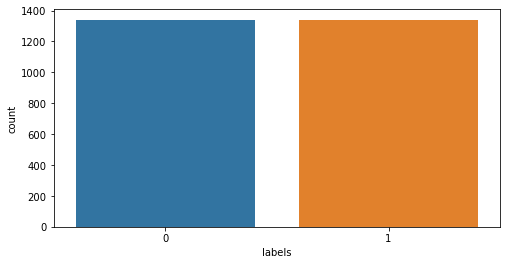

In [27]:
import seaborn as sns

plt.figure(figsize=(8,4))
map_characters = {0: 'No Neumonía', 1: 'Si Neumonía'}
dict_characters=map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [9]:
"""
X_trainReshaped.shape
y_train
"""


'\nX_trainReshaped.shape\ny_train\n'

In [28]:

X_trainReshaped = X_train.reshape(len(X_train),150,150,1)
X_testReshaped = X_test.reshape(len(X_test),150,150,1)

In [29]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(X_trainReshaped, 
          y_train, 
          epochs=20,
          validation_data = (X_testReshaped,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/20
84/84 [==============================] - 62s 732ms/step - loss: 0.4432 - accuracy: 0.7819 - val_loss: 0.9651 - val_accuracy: 0.6987
Epoch 2/20
84/84 [==============================] - 60s 716ms/step - loss: 0.1908 - accuracy: 0.9247 - val_loss: 0.4607 - val_accuracy: 0.8061
Epoch 3/20
84/84 [==============================] - 60s 719ms/step - loss: 0.1283 - accuracy: 0.9549 - val_loss: 0.6876 - val_accuracy: 0.7548
Epoch 4/20
84/84 [==============================] - 60s 718ms/step - loss: 0.1090 - accuracy: 0.9597 - val_loss: 1.4080 - val_accuracy: 0.7083
Epoch 5/20
84/84 [==============================] - 60s 715ms/step - loss: 0.0989 - accuracy: 0.9616 - val_loss: 0.7301 - val_accuracy: 0.7933
Epoch 6/20
84/84 [==============================] - 58s 694ms/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 1.1640 - val_accuracy: 0.7644
Epoch 7/20
84/84 [==============================] - 58s 697ms/step - loss: 0.0735 - accuracy: 0.9728 - val_loss: 0.8621 - val_accuracy: 0.7901

In [31]:
test_loss, test_acc = model.evaluate(X_testReshaped, y_test)
print(test_acc)

20/20 [==============================] - 3s 126ms/step - loss: 1.5759 - accuracy: 0.8109
0.8108974099159241


In [33]:
test_loss, test_acc = model.evaluate(X_trainReshaped, y_train)
print(test_acc)

84/84 [==============================] - 11s 129ms/step - loss: 0.0108 - accuracy: 0.9948
0.9947800040245056
